In [14]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
symbol = 'MSFT' #'AMZN','AAPL', 'GOOGL'
data_source='yahoo' #'google'
start_date = '2016-01-01'
end_date = '2021-01-01'
df = pd.read_csv("C:\\Users\\hp\\Desktop\\data\\AAPL.csv",index_col ='Date')
close = df['Close']

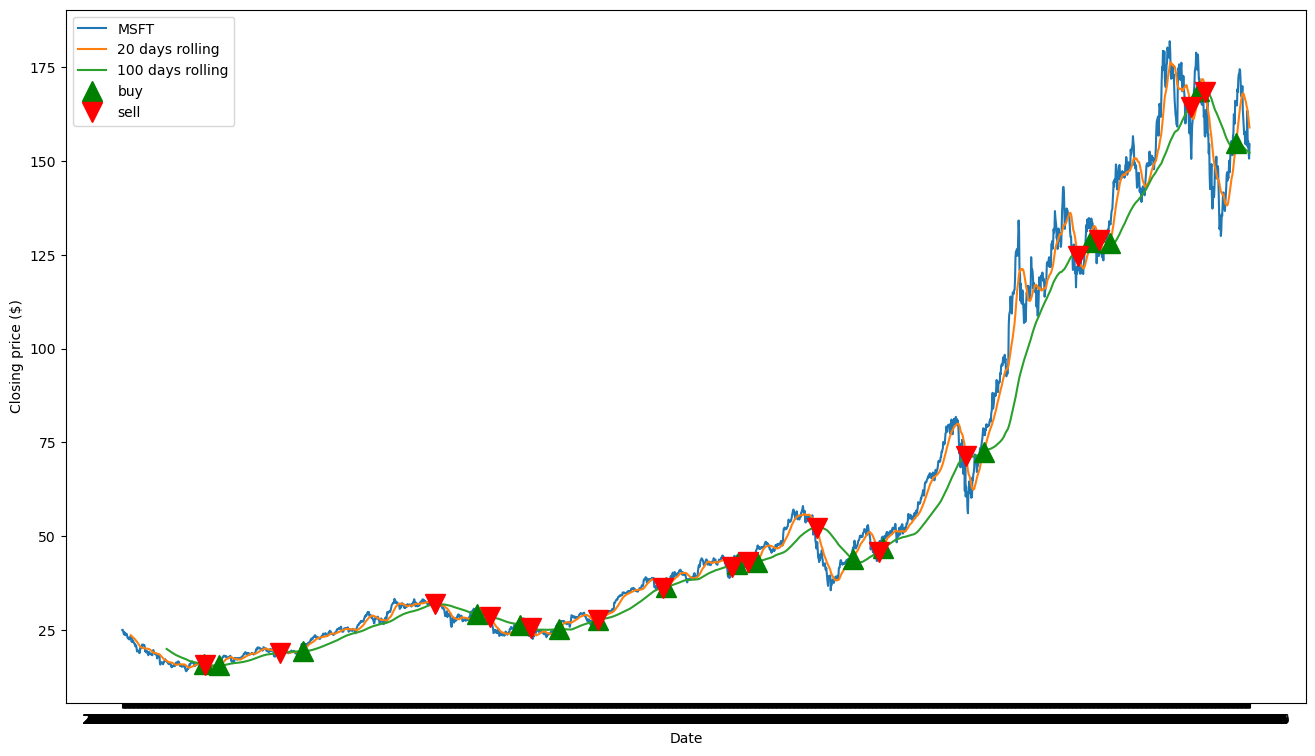

In [15]:
# Calculate the 20 and 100 days moving averages
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=100).mean()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Calculate the 'buy' and 'sell' signals and positions
df['Signal'] = 0.0
df['Signal'] = np.where(short_rolling > long_rolling, 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# Plot the data
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close.index, close, label=symbol)
ax.plot(short_rolling.index, short_rolling, label='20 days rolling')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index,
short_rolling[df['Position'] == 1],
'^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].
index,
short_rolling[df['Position'] == -1],
'v', markersize = 15, color = 'r', label = 'sell')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price ($)')
ax.legend()
plt.show()

In [16]:
# Example 11.10 Stock Prediction with LSTM
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Epoch 1/10
2257/2257 - 7s - loss: 0.0011 - 7s/epoch - 3ms/step
Epoch 2/10
2257/2257 - 5s - loss: 9.7076e-05 - 5s/epoch - 2ms/step
Epoch 3/10
2257/2257 - 5s - loss: 1.0161e-04 - 5s/epoch - 2ms/step
Epoch 4/10
2257/2257 - 5s - loss: 9.7028e-05 - 5s/epoch - 2ms/step
Epoch 5/10
2257/2257 - 6s - loss: 9.6184e-05 - 6s/epoch - 3ms/step
Epoch 6/10
2257/2257 - 6s - loss: 9.0402e-05 - 6s/epoch - 3ms/step
Epoch 7/10
2257/2257 - 6s - loss: 8.8712e-05 - 6s/epoch - 3ms/step
Epoch 8/10
2257/2257 - 6s - loss: 8.9005e-05 - 6s/epoch - 3ms/step
Epoch 9/10
2257/2257 - 6s - loss: 9.1223e-05 - 6s/epoch - 3ms/step
Epoch 10/10
2257/2257 - 6s - loss: 8.7674e-05 - 6s/epoch - 2ms/step
8/8 [==============================] - 0s 1ms/step
Train Score: 1.73 RMSE
Test Score: 5.42 RMSE


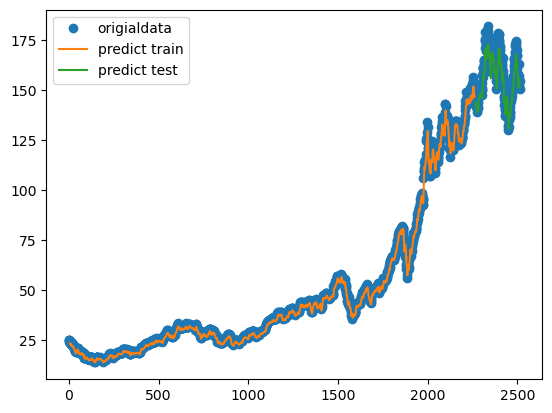

In [25]:
def create_dataset(dataset, xback=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-xback-1):
        a = dataset[i:(i+xback), 0]
        dataX.append(a)
        dataY.append(dataset[i + xback, 0])
    return numpy.array(dataX), numpy.array(dataY)
def getData(file, col):
    # load the dataset
    dataframe = read_csv(file,usecols=[col], engine='python')
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    # normalize the dataset
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    train_size = int(len(dataset) * ratio)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len (dataset),:]
    trainX, trainY = create_dataset(train, xback)
    testX, testY = create_dataset(test, xback)
    # reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
    testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
    return trainX, trainY,testX, testY, dataset
def train(trainX, trainY,testX, testY):
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(xback, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
    return model
def predict(model, trainX, trainY,testX, testY, dataset):
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0],
    trainPredict[:,0]))
    print('Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    # shift train predictions for plotting
    trainPredictPlot = numpy.empty_like(dataset)
    trainPredictPlot[:, :] = numpy.nan
    trainPredictPlot[xback:len(trainPredict)+xback, :] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = numpy.empty_like(dataset)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(trainPredict)+(xback*2)+1:len(dataset)-1,:]= testPredict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset),'o',label='origialdata')
    plt.plot(trainPredictPlot,label='predict train')
    plt.plot(testPredictPlot,label='predict test')
    plt.legend()
    plt.show()
# reshape into X=5 and Y=5+1
xback = 5
#numpy.random.seed(7)
scaler = MinMaxScaler(feature_range=(0, 1))
ratio = 0.9
file = 'C:\\Users\\hp\\Desktop\\data\\AAPL.csv'
col = 4
trainX, trainY,testX, testY, dataset = getData(file,col)
model = train(trainX, trainY,testX, testY)
predict(model, trainX, trainY,testX, testY, dataset)